<a href="https://colab.research.google.com/github/10KimJunGu/pythonadv/blob/main/8_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 실습에 사용할 데이터 셋

In [8]:
import pandas as pd
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()

In [10]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [14]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
df_iris = pd.DataFrame(data, columns = feature_names)

In [16]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
df_iris['target'] = target # target데이터를 옆에다가 붙여보기

In [18]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 2. 시각화

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


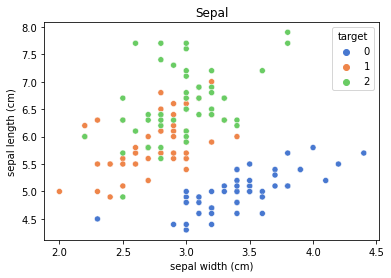

In [20]:
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris)
# sepel width : x값의 제목
# sepal length : y값의 제목
# hue='target' : 데이터가 실제로 쓰이는 컬럼은 target (target을 분류하겠다)
# palette : 색상결정
plt.title('Sepal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


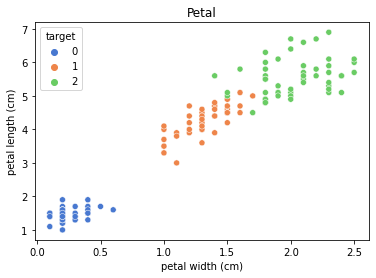

In [21]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


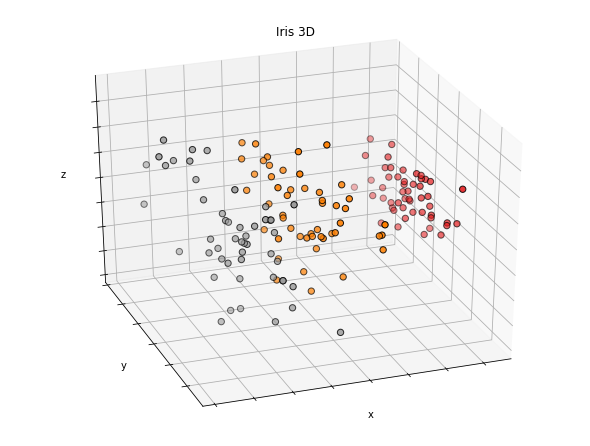

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# 몰라도 되고 이런게 있구나라고 보면된다

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title('Iris 3D')
ax.set_xlabel('x')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('y')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('z')
ax.w_zaxis.set_ticklabels([])
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [25]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [26]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


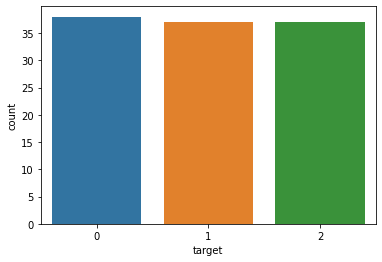

In [27]:
sns.countplot(y_train)

# 3. Logistic Regression

* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)
* 로지스틱 회귀: 영구의 통계학자인 D.R. Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법
* 로지스틱 회귀, 서포트 벡터 머신과 같은 알고리즘은 이진 분류만 가능(2개의 클래스 판별만 가능)
  * 3개 이상의 클래스에 대한 판별을 진행하는 경우 아래와 같은 전략으로 판별
    * one-vs-rest(OvR):  K개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 클래스를 판별
    * one-vs-one(OvO): 4개의 계정을 구분하는 클래스가 존재한다고 할 때, Ovs1, Ovs2, Ovs3, .., 2vs3 까지의 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별

> 대부분 OvsR 전략을 선호

* Linear Regression : 직선을 그어주는(예측 선을 그어주는 회귀)
* Logistic Regression : 분류에 쓰이는 회귀

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(x_train, y_train)

LogisticRegression()

In [31]:
prediction = model.predict(x_valid)

In [32]:
prediction[:5]

array([2, 0, 1, 0, 2])

In [33]:
(prediction == y_valid).mean() # 모델에 대한 평가

0.9473684210526315

# 4. SGDClassifier : 확률적 경사하강법

* stochastic gradient descent(SGD): 확률적 경사 하강법
* [sklearn 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
* 전체 데이터가 아닌 랜덤하게 추출한 일부 데이터 한개에 대해서 그래디언트를 계산하고 경사 하강 알고리즘을 적용하는 방법
* 학습 중간 과정에서 결과의 진폭이 크고 불안정하지만 속도가 매우 빠름

In [34]:
from IPython.display import Image

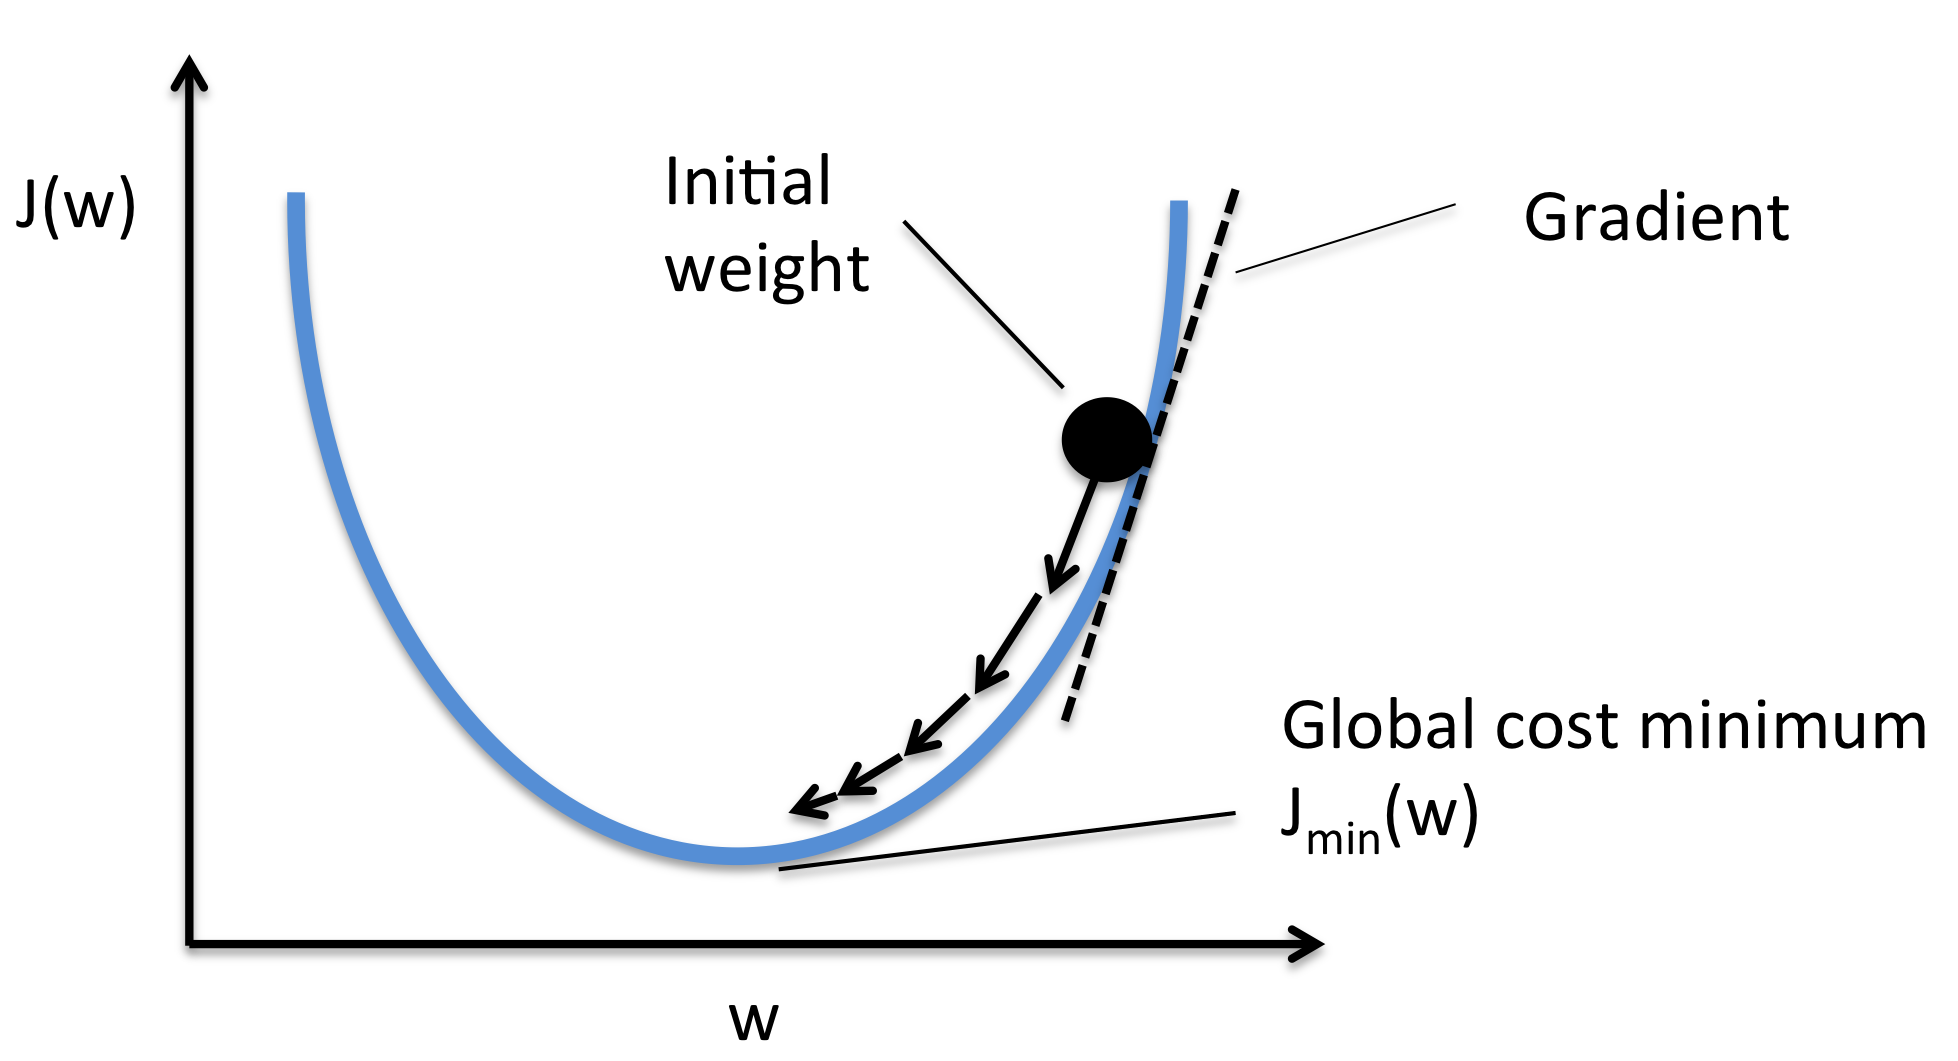

In [35]:
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=500)

In [36]:
from sklearn.linear_model import SGDClassifier

In [37]:
sgd = SGDClassifier(random_state=0) # 숫자는 아무거나 넣어도 상관없음

In [38]:
sgd.fit(x_train, y_train) # 학습하기

SGDClassifier(random_state=0)

In [39]:
prediction = sgd.predict(x_valid) # 예측하기

In [40]:
(prediction == y_valid).mean() # 얼마만큼 맞출 수 있는지 확인하기

0.6578947368421053

### 4-1. 하이퍼 파라미터 튜닝

* 각 알고리즘 별 하이퍼 파라미터의 종류는 매우 다양함
* 문서를 보고 적절한 가설을 세운 후 적용하여 검증
* 하이퍼 파라미터는 자동으로 조절하는 기능도 있음

In [41]:
sgd = SGDClassifier(penalty='elasticnet', random_state=0, n_jobs=-1, l1_ratio=0.2) # n_jobs=-1 : cpu를 전부 사용

In [42]:
sgd.fit(x_train, y_train)

SGDClassifier(l1_ratio=0.2, n_jobs=-1, penalty='elasticnet', random_state=0)

In [43]:
prediction = sgd.predict(x_valid)

In [44]:
(prediction == y_valid).mean()

0.8947368421052632

# 5. KNeighbersClassifier

* 최근접 이웃 알고리즘


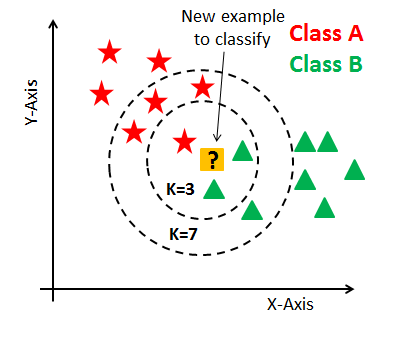

In [45]:
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knc = KNeighborsClassifier() # 기본값은 n_neighbors=5이다.

In [48]:
knc = KNeighborsClassifier(n_neighbors=12)

In [49]:
knc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [50]:
knc_pred = knc.predict(x_valid)

In [51]:
(knc_pred == y_valid).mean()

0.9473684210526315

# 6. 서포트 벡터 머신(SVC)

* 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듬
* 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘
* LogisticRegression과 같이 이진 분류만 가능(2개의 클래스 판별만 가능)
* OvsR 전략을 사용
* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

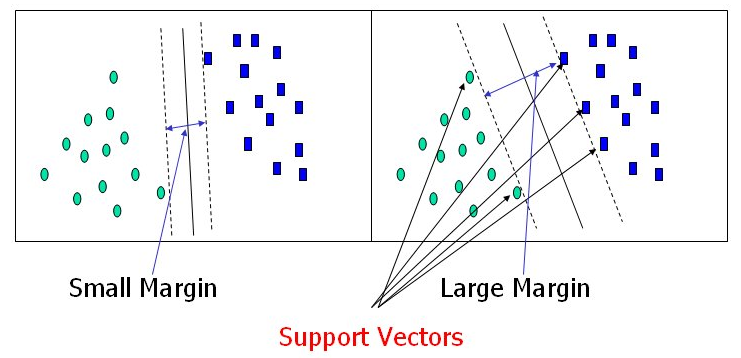

In [52]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

In [53]:
from sklearn.svm import SVC

In [54]:
svc = SVC(random_state=0)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_valid)

In [55]:
svc

SVC(random_state=0)

In [56]:
(svc_pred == y_valid).mean() # 평가

0.9473684210526315

In [57]:
svc_pred[:5]

array([2, 0, 1, 0, 2])

In [58]:
svc.decision_function(x_valid)[:5] # 각 클래스별 확률값을 return

array([[-0.22714749,  0.91444004,  2.23767066],
       [ 2.21869354,  1.18748228, -0.25383756],
       [-0.2177173 ,  2.22995931,  0.91515767],
       [ 2.22636635,  1.17533984, -0.25445687],
       [-0.20814598,  0.80404906,  2.25181368]])

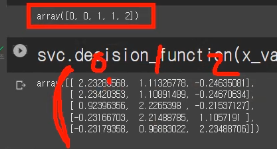

# 7. 의사 결정 나무(Decision Tree)

* 스무고개처럼 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것
* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

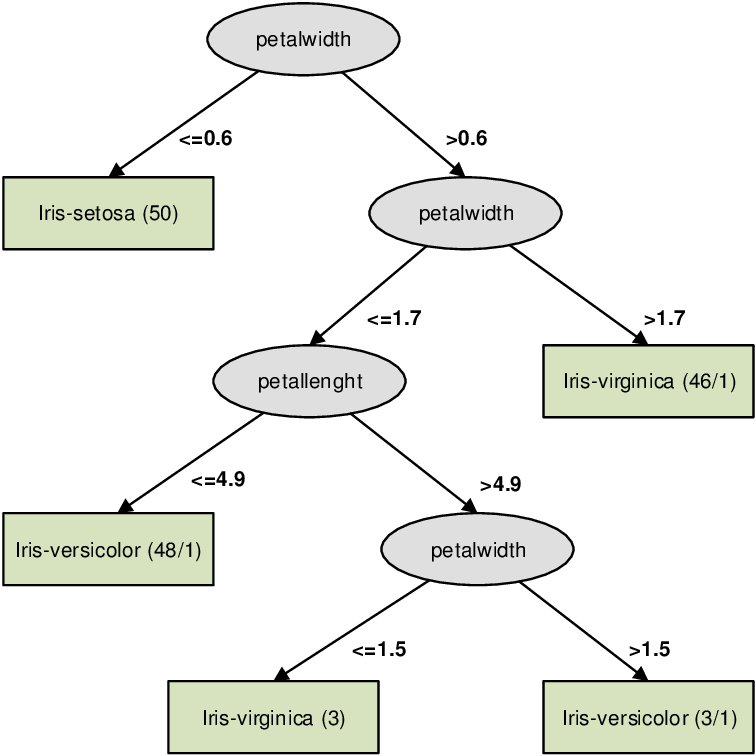

In [59]:
Image('DecisionTree.png', width=500)


In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtc = DecisionTreeClassifier(random_state=0)

In [62]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [63]:
dtc_pred = dtc.predict(x_valid)

In [64]:
(dtc_pred == y_valid).mean()

0.9473684210526315

In [65]:
from sklearn.tree import export_graphviz
from subprocess import call

In [66]:
def graph_tree(model):
  export_graphviz(model, out_file='tree.dot')
  call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])
  
  return Image(filename='decistion-tree.png', width=700)

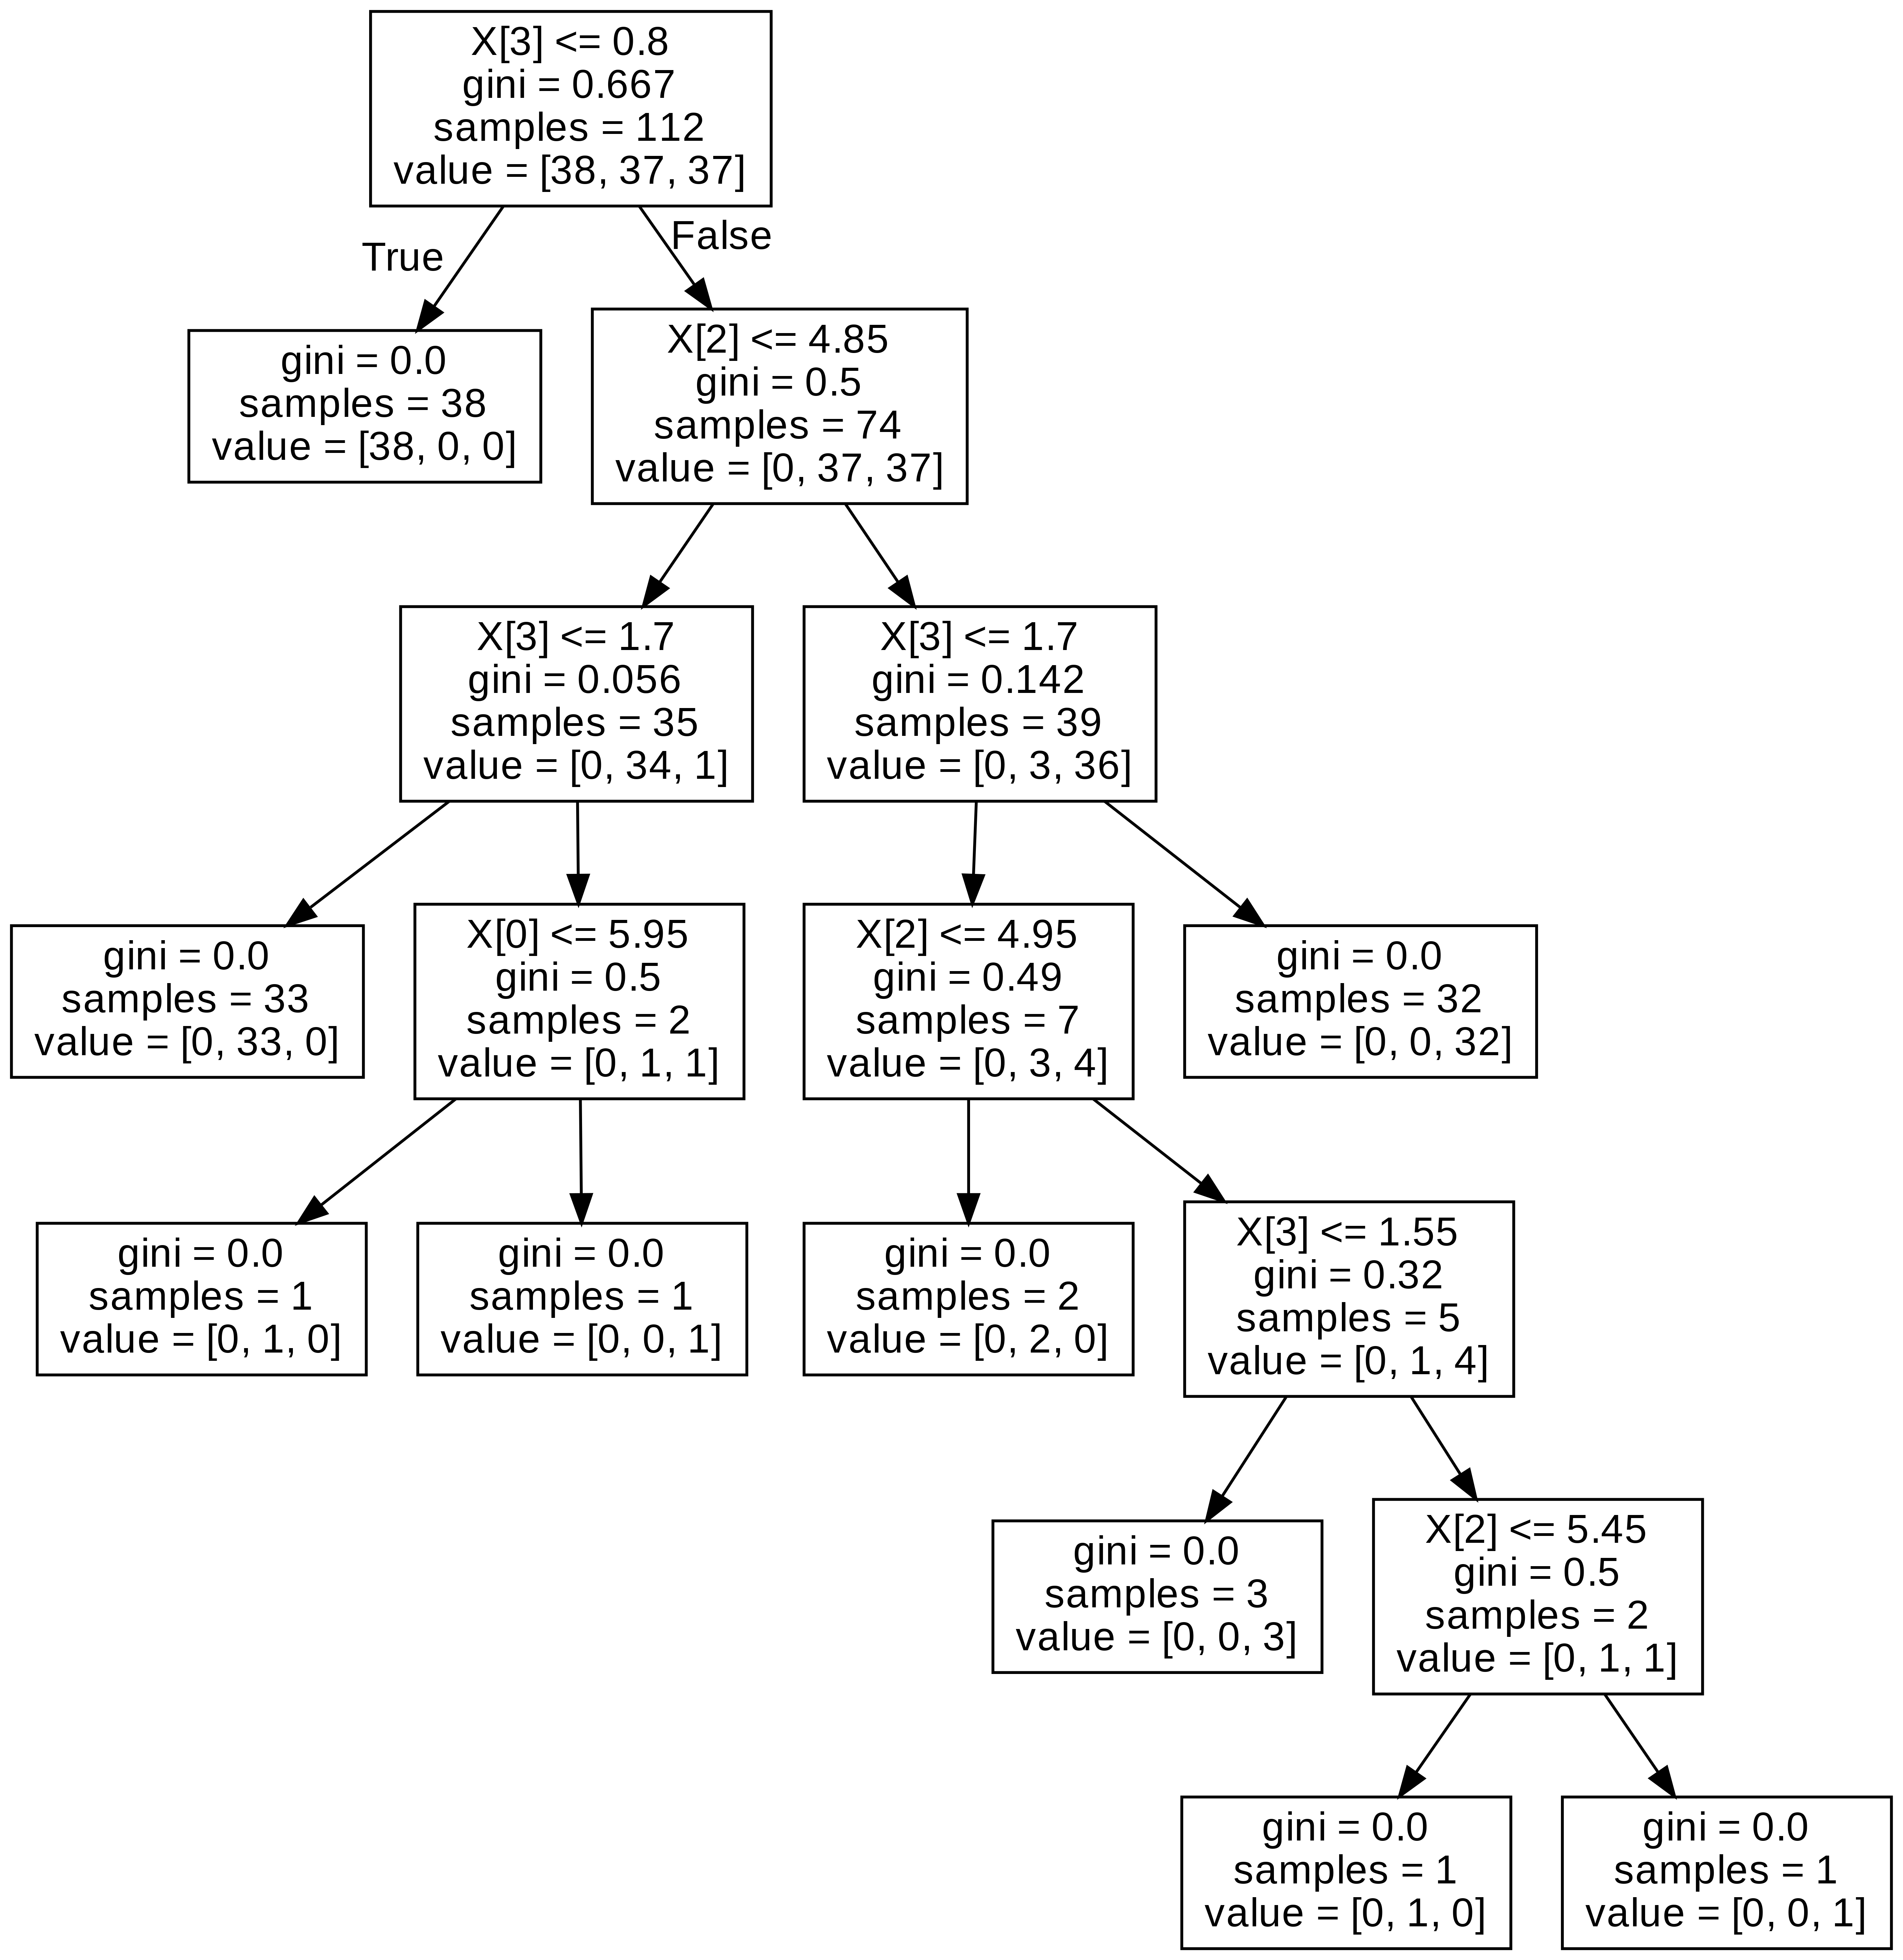

In [67]:
graph_tree(dtc)

* gini계수: 불순도를 의미. 계수가 높을 수록 엔트로피가 크다는 의미
* 엔트로피: 클래스가 얼마나 혼잡하게 섞여있는지를 의미

In [68]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)

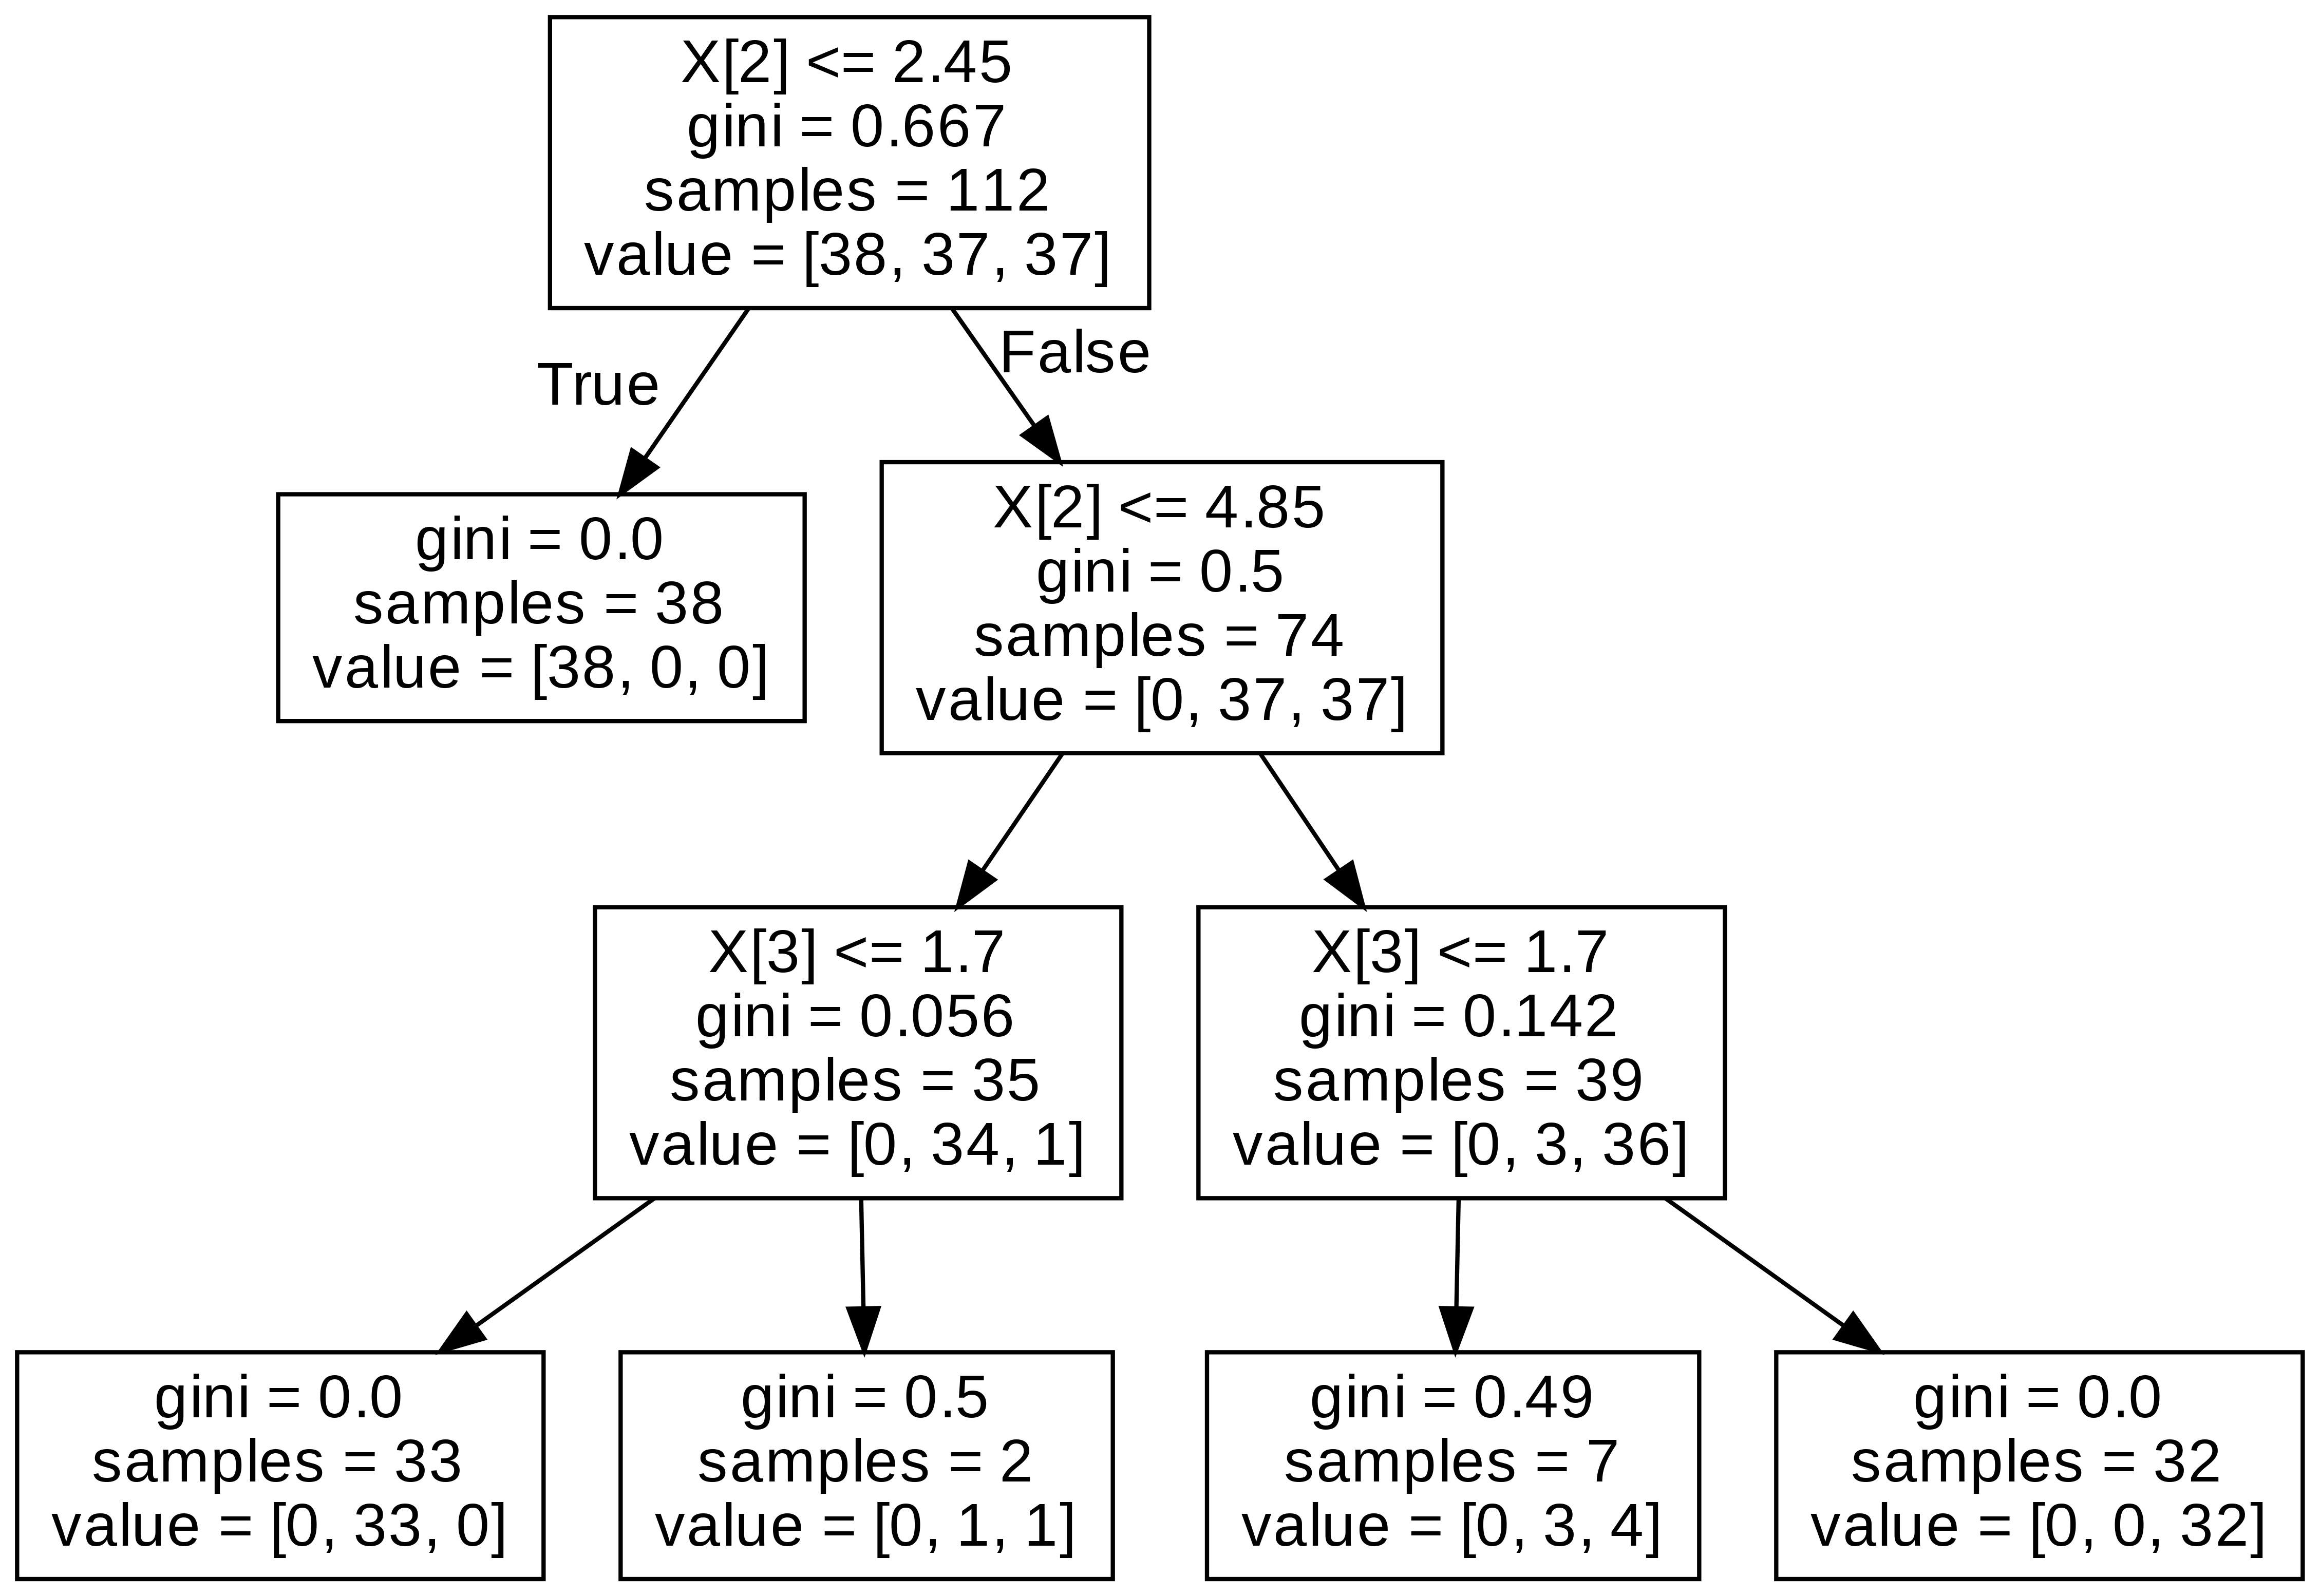

In [69]:
graph_tree(dtc)

# 8. 오차(Error)

In [70]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

In [71]:
cancer = load_breast_cancer()

In [72]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [73]:
data = cancer['data']
target = cancer['target']
feature_names = cancer['feature_names']

In [74]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = cancer['target']

In [75]:
# target -> 0:악성종양, 1:양성종양
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [76]:
pos = df.loc[df['target'] == 1] # 양성종양
neg = df.loc[df['target'] == 0] # 악성종양

In [77]:
pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [78]:
neg

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


In [79]:
sample = pd.concat([pos, neg[:10]], sort=True)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(sample.drop('target', 1), sample['target'], random_state=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [81]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [82]:
(pred == y_test).mean()

0.9891304347826086

In [83]:
my_prediction = np.ones(shape=y_test.shape)

In [84]:
(my_prediction == y_test).mean()

0.9782608695652174

* 정확도만 놓고 보면 무조건 음성 환자로 예측하는 분류기가 성능이 좋음
* 정확도만 보고 분류기의 성능을 판별하는 것은 오류에 빠질 수 있음
* 이를 보완하기 위해 생겨난 지표들이 있음

### 8-1. 오차 행렬(confusion matrix)

* 정확도: 예측이 정답과 얼마나 정확한가?
* 정밀도: 예측한 것중에 정답의 비율은?
* 재현율: 찾아야 할 것중에 실제로 찾은 비율은?
* F1 Score: 정밀도와 재현율의 평균

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(y_test, pred)

array([[ 1,  1],
       [ 0, 90]])

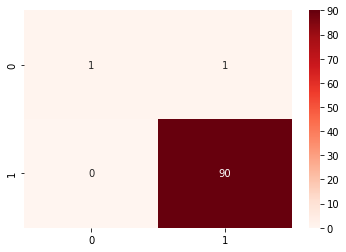

In [87]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Reds')

### 8-2. 정밀도(precision)
- TP / (TP + FP)
- 무조건 양성으로 판단해서 계산하는 방법 

> 무조건 양성으로 판단하면 좋은 정밀도를 얻기 때문에 유용하지 않음

In [88]:
from sklearn.metrics import precision_score, recall_score

In [89]:
precision_score(y_test, pred)

0.989010989010989

### 8-3. 재현율(recall)
* TP / (TP + FN)
* 정확하게 감지한 양성 샘플의 비율
* 민감도 혹은 TPR(True Positive Rate)라고도 부름

In [90]:
recall_score(y_test, pred)

1.0

In [91]:
90 / 90

1.0

### 8-4. f1 score
* 정밀도와 재현율의 조화 평균을 나타내는 지표
* $$2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$$

In [92]:
from sklearn.metrics import f1_score

In [93]:
f1_score(y_test, pred)

0.994475138121547